In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Our model for the distance modulus is given by:

$\mu = 5\log_{10}\left(\frac{d_{L}}{Mpc}\right)+25$

where:

$d_{L} = d_{p}(1+z)$

or:

$d_{L} = (1+z)\frac{c}{H_{0}}\int_{a_{e}}^{a_{0}=1}\frac{da'}{\sqrt{\Omega_{M,0}a'+\Omega_{\gamma,0}+\Omega_{\Lambda}a'^{4}}}$

then, our complete model:

$\mu = 5\log_{10}\left(\frac{(1+z)\frac{c}{H_{0}}\int_{a_{e}}^{a_{0}=1}\frac{da'}{\sqrt{\Omega_{M,0}a'+\Omega_{\gamma,0}+\Omega_{\Lambda}a'^{4}}}}{Mpc}\right)+25$

What we're trying to do is to minimize the $\chi^{2}$ quantity, which is equal to maximize the likelihood (the probability of getting a data given a model):

$\chi^{2} = \sum \left(\frac{\Delta Y_{i}}{\sigma_{i}}\right)^{2}$

where $\Delta Y_{i} = data_{i}-model_{i}$ and $\sigma_{i}$ is the error in the measurement.

**Importing the data from: https://supernov
a.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.tx**t

In [3]:
data = np.genfromtxt('https://supernova.lbl.gov/Union/figures/SCPUnion2.1_mu_vs_z.txt')
data.shape

(580, 5)

In [4]:
z = data[:,1:2] #redshift
mu = data[:,2:3] #Distance modulus
mu_err = data[:,3:4] #Distance modulus error

In [5]:
print(z.shape,mu.shape,mu_err.shape)

(580, 1) (580, 1) (580, 1)


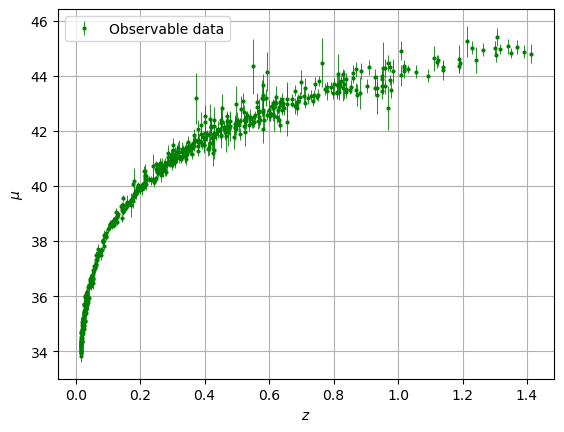

In [6]:
plt.errorbar(z.flatten(), mu.flatten(), yerr = mu_err.flatten(), fmt = '.', color = 'green', label = 'Observable data', linewidth = 0.6, ms = 4)
plt.legend()
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.grid()

In [7]:
H_0 = 70
c = 300000

In [8]:
params = [1, 0.32, 0.68, 0] #[omega_0, omega_m, omega_lambda, omega_gamma]

In [9]:
def simpson(params, z):
    y = 1/(np.sqrt((params[0]/(1/(1+z)))+(1-params[0])))
    I = ((1-(1/(1+z)))/6)*((1/(params[3] + (params[1]*(1/(1+z)))+(params[2]*((1/(1+z))**4))))+4*(1/(params[3] + (params[1]*((1/(1+z))+1))+(params[2]*(((1/(1+z))+1**4)))))+(1/(params[3] + (params[1]*1)+(params[2]*(1**4)))))
    return (c/H_0)*I

In [10]:
def model(params, z):
    I = np.zeros(len(z))
    d_l = np.zeros(len(z))
    for i in range(len(z)):
        I[i] = simpson(params,z[i])
        d_l[i] =(I[i]/(1/(1+z[i])))
    mu_model = 5*np.log10(d_l)+25
    return mu_model

In [11]:
def chisq(params, z, mu, mu_err):
    model_= model(params,z)
    delta_Y = mu - model_
    return np.sum((delta_Y / mu_err)**2)

In [34]:
model_ = model(params,z)

In [35]:
chisquared = chisq(params, z, mu, mu_err)

In [36]:
from scipy.optimize import fmin

In [55]:
chisqs = np.zeros(100)
for i in range(100):
    o_l = np.linspace(0,0.8,100)
    parameters = [1, 0.32, o_l[i], 0]
    model_i = model(parameters, z)
    chisqs[i] = chisq(parameters, z, mu, mu_err)

for i in range(100):
    if chisqs[i]==min(chisqs):
        num = i
        
print('El mejor valor de lambda es: %.2f' , o_l[num])        

El mejor valor de lambda es: %.2f 0.4767676767676768


In [56]:
parameters_best_fit = [1,0.32,o_l[num],0]
best_fit_model = model(parameters_best_fit, z)

Text(0.5, 1.0, 'Parameter estimation (Min $\\chi^{2}$)')

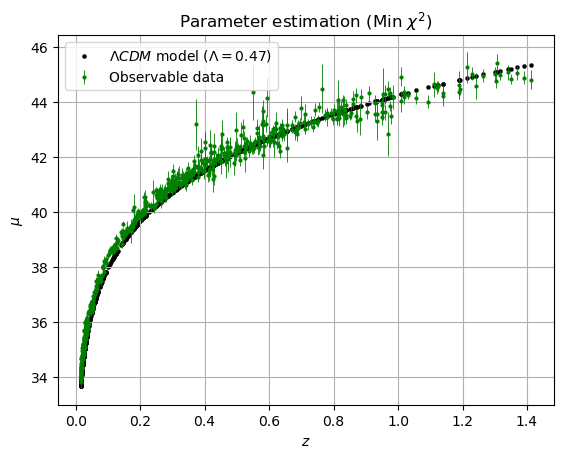

In [58]:
plt.errorbar(z.flatten(), mu.flatten(), yerr = mu_err.flatten(), fmt = '.', color = 'green', label = 'Observable data', linewidth = 0.6, ms = 4)
plt.scatter(z, best_fit_model, color = 'black', label = '$\Lambda CDM$ model ($\Lambda = 0.47$)', marker = '.', linewidth = 0.2)
plt.legend()
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.grid()
plt.title('Parameter estimation (Min $\chi^{2}$)')